In [1]:
import scanpy as sc
import pandas as pd 
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from plotnine import * 
from plotnine.data import mtcars

# for Panel G

In [2]:
adata_processed = sc.read_h5ad('SS2_processed.h5ad')

In [3]:
df_sort = adata_processed.obs

In [4]:
cat_order = ['Metastatic', 'Tumor']

df_sort['sort'] = pd.Categorical(df_sort['sort'], categories=cat_order, ordered=True)

cat_order = ['J55454', 'H5471', 'HCI005', 'H3204', 'H4272', 'HCI009',
            'HCI011', 'HCI001', 'H5097', 'J2036', 'J53353', 'HCI010']

df_sort['Tumor_ID'] = pd.Categorical(df_sort['Tumor_ID'], categories=cat_order, ordered=True)

In [5]:
plot_ref = (ggplot(df_sort) 
            + geom_bar(aes(x='Tumor_ID', fill='sort')) 
            + scale_fill_manual(['#377eb8', '#ff7f00']) 
            + theme(axis_text_x=element_text(rotation=90, hjust=1), 
                    panel_grid_major_y=element_blank(),
                    panel_background=element_rect(fill='white', alpha=.2),
                    panel_border=element_rect(color='black', size=1))
               )

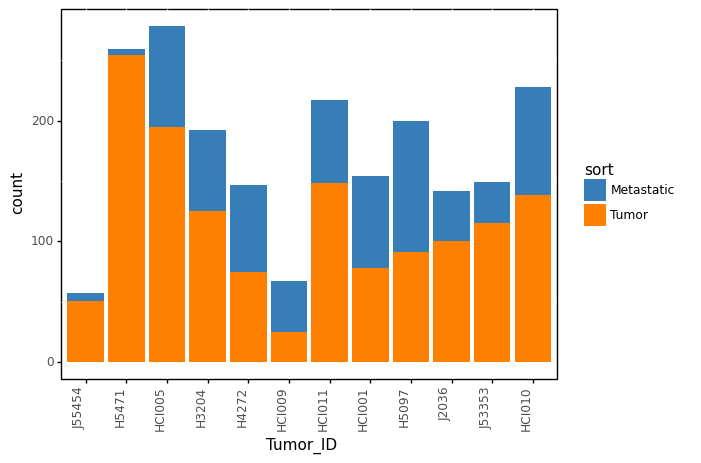

<ggplot: (8749544128386)>

In [6]:
plot_ref

In [7]:
save_as_pdf_pages([plot_ref],'SS2_cell_number_for_each_tumor&sort_ref.pdf')

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: SS2_cell_number_for_each_tumor&sort_ref.pdf


In [8]:
plot_no_labels = (ggplot(df_sort) 
            + geom_bar(aes(x='Tumor_ID', fill='sort')) 
            + guides(fill = None)
            + scale_fill_manual(['#377eb8', '#ff7f00']) 
            + theme(plot_background=element_rect(fill='white', alpha=.3),
                    panel_background=element_rect(fill='white', alpha=.2),
                    panel_border=element_rect(color='black', size=1),
                    axis_title_x=element_blank(), axis_title_y=element_blank(), 
                    axis_text_x=element_blank(), axis_text_y=element_blank())
               )

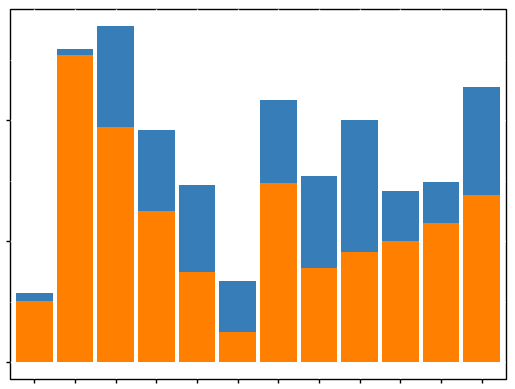

<ggplot: (8749541823862)>

In [9]:
plot_no_labels

In [10]:
save_as_pdf_pages([plot_no_labels],'SS2_cell_number_for_each_tumor&sort.pdf')

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: SS2_cell_number_for_each_tumor&sort.pdf


# for Panels F, H, and I

In [11]:
def auc_value(adata, group = 'sort', label_1 = 'Tumor', label_2 = 'Metastatic', pc_num = 1):
    df_loadings = pd.DataFrame(adata.obsm['X_pca'], index=adata.obs_names)[[pc_num]]
    df_loadings['label'] = ""
    for j in df_loadings.index:
        sort = adata.obs.loc[j, group]
        if sort == label_1:
            df_loadings.loc[j, 'label'] = 0
        elif sort == label_2:
            df_loadings.loc[j, 'label'] = 1
            
    false_positive_rate, true_positive_rate, threshold1 = roc_curve(df_loadings['label'].tolist(), df_loadings[1].tolist())
    
    auc = roc_auc_score(df_loadings['label'].tolist(),df_loadings[1].tolist())
    
    return false_positive_rate, true_positive_rate, auc

In [12]:
def auc_value_switch_labels(adata, group = 'sort', label_1 = 'Tumor', label_2 = 'Metastatic', pc_num = 1):
    df_loadings = pd.DataFrame(adata.obsm['X_pca'], index=adata.obs_names)[[pc_num]]
    df_loadings['label'] = ""
    for j in df_loadings.index:
        sort = adata.obs.loc[j, group]
        if sort == label_1:
            df_loadings.loc[j, 'label'] = 1
        elif sort == label_2:
            df_loadings.loc[j, 'label'] = 0
            
    false_positive_rate, true_positive_rate, threshold1 = roc_curve(df_loadings['label'].tolist(), df_loadings[1].tolist())
    
    auc = roc_auc_score(df_loadings['label'].tolist(),df_loadings[1].tolist())
    
    return false_positive_rate, true_positive_rate, auc

In [13]:
def ROC_curve(false_positive_rate, true_positive_rate, tumor_ID):

    
    plt.figure(figsize=(5, 5), dpi=50)
        
    lw = 2
    plt.plot(false_positive_rate, true_positive_rate, color='black',
         lw=lw)
    plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('')
    plt.ylabel('')
    plt.title('')

#     plt.yaxis.grid(False)
#     plt.xaxis.grid(False)
    

    plt.tick_params(labelleft=True,labelbottom=True)


    plt.show()

    plt.savefig('ROC_'+tumor_ID+'.pdf')


In [14]:
files_SS2 = ['SS2_processed.h5ad',
            'SS2_H3204.h5ad',
            'SS2_H4272.h5ad',
            'SS2_H5097.h5ad',
            'SS2_H5471.h5ad',
            'SS2_HCI001.h5ad',
            'SS2_HCI005.h5ad',
            'SS2_HCI009.h5ad',
            'SS2_HCI010.h5ad',
            'SS2_HCI011.h5ad',
            'SS2_J2036.h5ad',
            'SS2_J53353.h5ad',
            'SS2_J55454.h5ad']

global


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


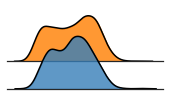

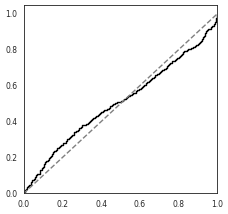

<Figure size 432x288 with 0 Axes>

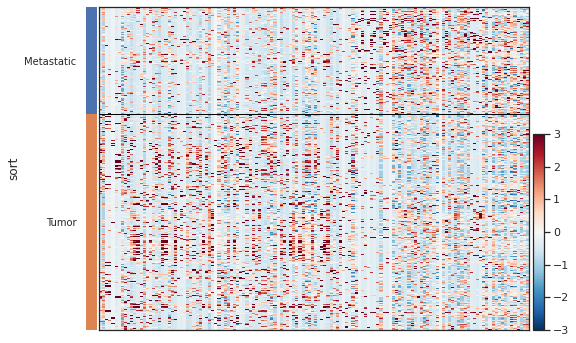

H3204


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


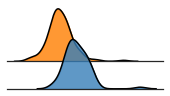

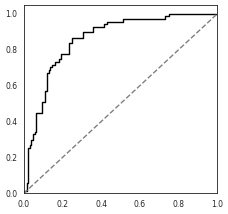

<Figure size 432x288 with 0 Axes>

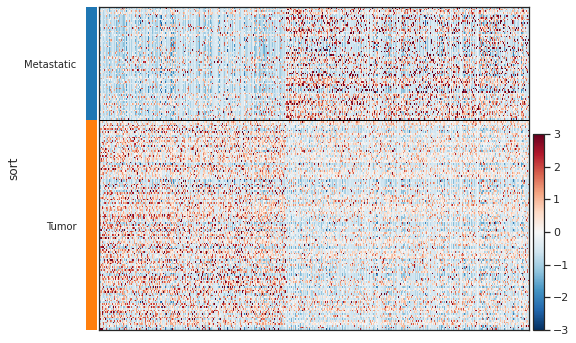

H4272


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


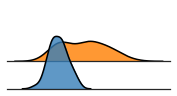

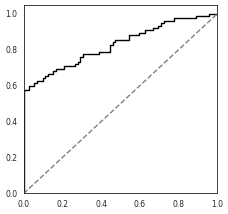

<Figure size 432x288 with 0 Axes>

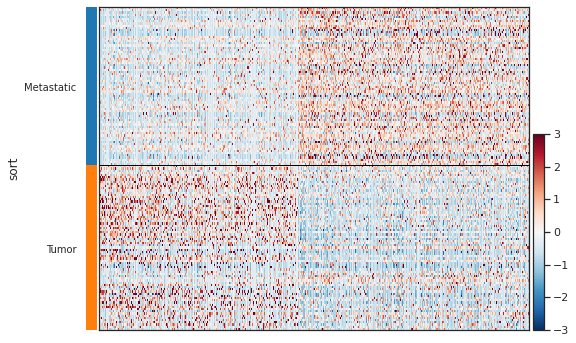

H5097


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


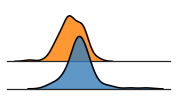

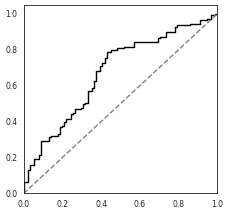

<Figure size 432x288 with 0 Axes>

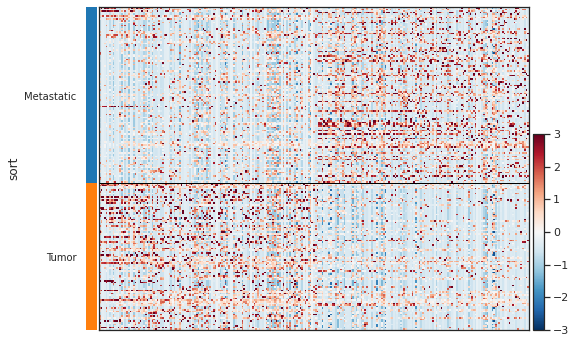

H5471


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


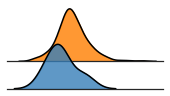

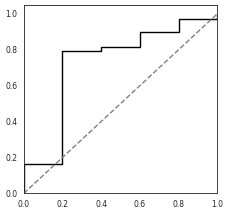

<Figure size 432x288 with 0 Axes>

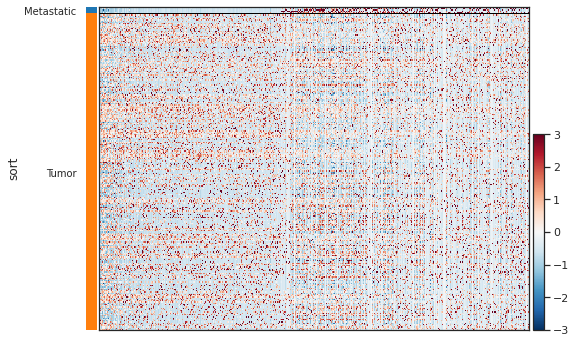

HCI001


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


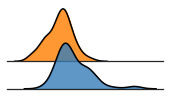

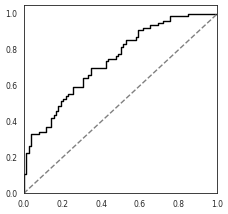

<Figure size 432x288 with 0 Axes>

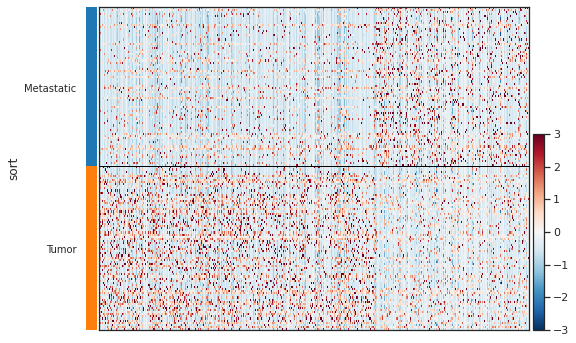

HCI005


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


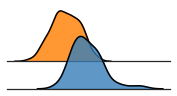

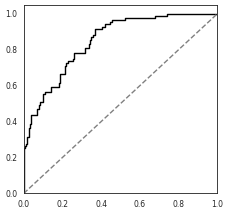

<Figure size 432x288 with 0 Axes>

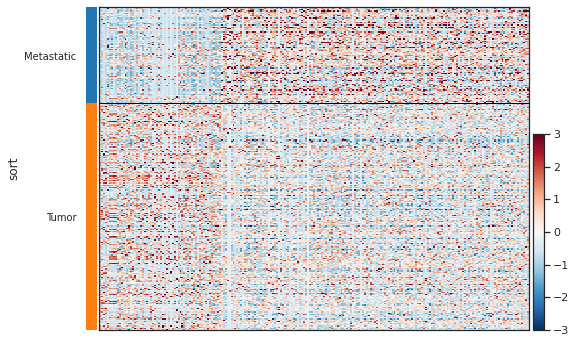

HCI009


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


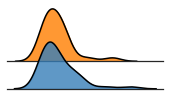

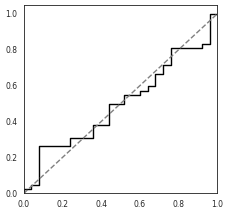

<Figure size 432x288 with 0 Axes>

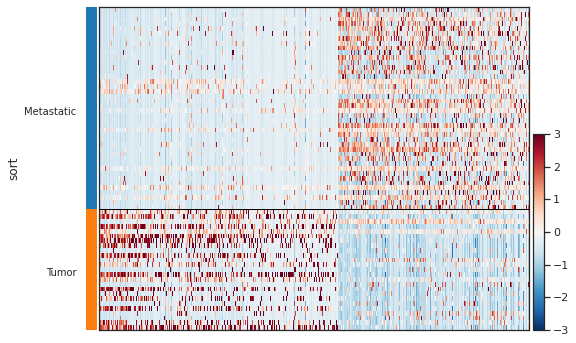

HCI010


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


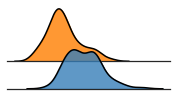

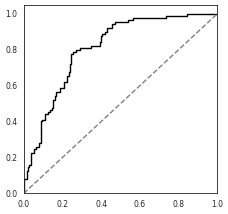

<Figure size 432x288 with 0 Axes>

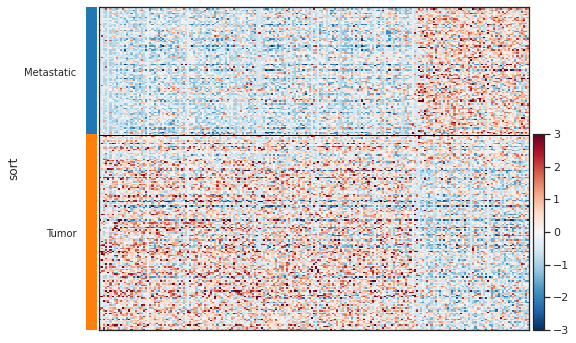

HCI011


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


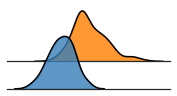

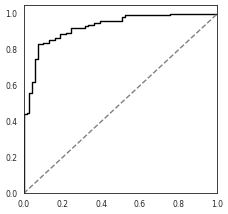

<Figure size 432x288 with 0 Axes>

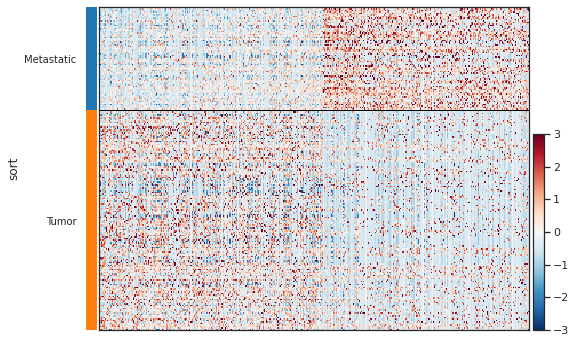

J2036


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


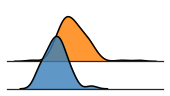

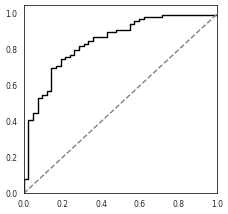

<Figure size 432x288 with 0 Axes>

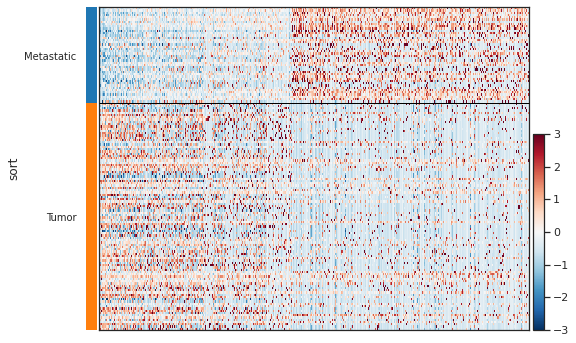

J53353


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


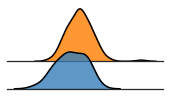

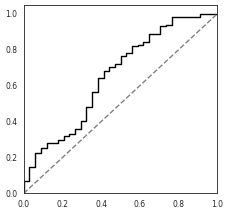

<Figure size 432x288 with 0 Axes>

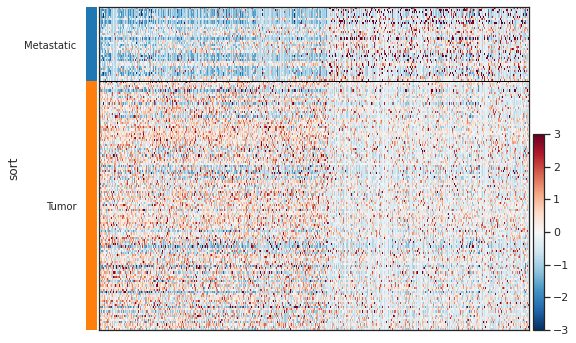

J55454


/home/weilun/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


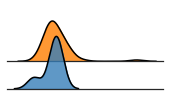

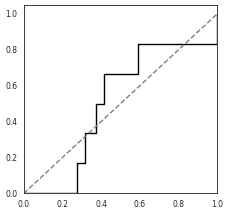

<Figure size 432x288 with 0 Axes>

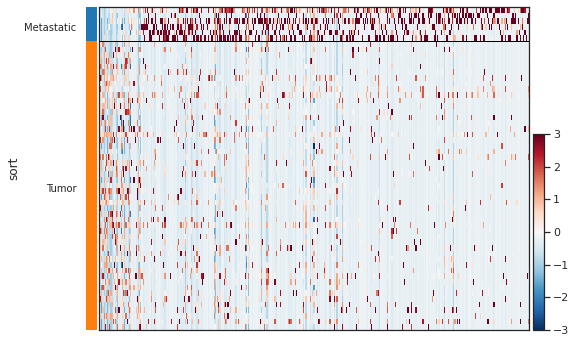

In [15]:
roc_auc_df = pd.DataFrame(index=['global','HCI011','H3204','H4272','H5097','H5471','HCI001',
                                 'HCI005','HCI009','HCI010','J2036','J53353','J55454'],columns=['auc','auc_switch_label'])

for i in files_SS2:
    SS2_adata = sc.read_h5ad(i)
    temp_df = pd.DataFrame(SS2_adata.obsm['X_pca'], index=SS2_adata.obs_names)
    for j in temp_df.columns:
        temp_df = temp_df.rename(columns={j: "pc_"+str(j)})
    auxdict = pd.Series(SS2_adata.obs['sort'].values,index=SS2_adata.obs.index).to_dict()
    temp_df['sort'] = temp_df.index.map(auxdict)
    tumor_id = i.split(".")[0].split("_")[1]
    if tumor_id == "processed":
        tumor_id = "global"
    print(tumor_id)
    
    ## making Ridge plots
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    g = sns.FacetGrid(temp_df, row="sort", height=1.2,hue="sort",palette=['#ff7f00','#377eb8'], hue_kws={"alpha": [0.8,0.8]},size=1,aspect=3)
    g.map_dataframe(sns.kdeplot, x="pc_1", fill=True, alpha=1)
    g.map_dataframe(sns.kdeplot, x="pc_1", color='black')
    g.fig.subplots_adjust(hspace=-.5)
    g.set_titles("")
    g.set(yticks=[],xticks=[])
    g.despine(left=True)
    plt.savefig('Ridge_SS2_'+tumor_id+'_sort.pdf',bbox_inches='tight')
    plt.show()
    
    
    ## making ROC Plots
    false_positive_rate1, true_positive_rate1, auc1 = auc_value(SS2_adata)
    false_positive_rate2, true_positive_rate2, auc2 = auc_value_switch_labels(SS2_adata)
        
    roc_auc_df.loc[tumor_id, 'auc'] = auc1
    roc_auc_df.loc[tumor_id, 'auc_switch_label'] = auc2
    
    if auc1 > auc2:
        ROC_curve(false_positive_rate1, true_positive_rate1, tumor_id)
    else:
        ROC_curve(false_positive_rate2, true_positive_rate2, tumor_id)
     
    ## saving the AUC value in csv
    roc_auc_df.to_csv('SS2_AUC_value.csv')
    
    
    ## making heatmap
    df = pd.read_csv('MAST_' + tumor_id + '.csv',index_col=0)
    df = df[df['p_val'] < 0.05]
    df_met = df[df['avg_log2FC'] >0.5].sort_values(ascending=False, by='avg_log2FC')
    df_tumor = df[df['avg_log2FC'] < -0.5].sort_values(ascending=True, by='avg_log2FC')
    SS2_adata_sub = SS2_adata[:,SS2_adata.var.index.isin(df_tumor.index.tolist()+df_met.index.tolist())].copy()
    SS2_adata_sub.X = SS2_adata_sub.layers['log1p']
    sc.pp.scale(SS2_adata_sub,max_value=10)
    sc.pl.heatmap(SS2_adata_sub,df_tumor.index.tolist()+df_met.index.tolist(),groupby='sort',use_raw=False,cmap='RdBu_r',vmin=-3,vmax=3, save='_' + tumor_id + ".pdf")